### This notebook classifies the samples based on their spectral peaks.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

A function for examining model metrics

In [2]:
def calculate_metrics(y_test, y_pred):

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {overall_accuracy}\n")

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # Show the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)


Read in the dataset.

In [3]:
df = pd.read_csv("../../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../../data/scaled_and_noise_removal.csv")
#pivoted_df = pd.read_csv("../../data/Unscaled_Baseline_Correction.csv")
#pivoted_df = pd.read_csv("../../data/Scaled_Baseline_Correction.csv")

In [4]:
# fastRP_df = pd.read_csv("../../data/fastRP_embeddings.csv")
# statuses_df = pd.read_csv("../../data/SpecIDs_and_Status.csv")
# pivoted_df = fastRP_df.merge(statuses_df, on="SpecID").sort_values(by="SpecID").set_index('SpecID')

In [5]:
df.head()

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,293,400.22778,1765.6628,201210-1,Normal
1,201210-1-00,294,400.91116,1774.7809,201210-1,Normal
2,201210-1-00,295,401.59454,1769.0302,201210-1,Normal
3,201210-1-00,296,402.27789,1756.4220,201210-1,Normal
4,201210-1-00,297,402.96127,1758.8690,201210-1,Normal


In [6]:
sample = df[df['SpecID'] == "210526-3-20"]

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

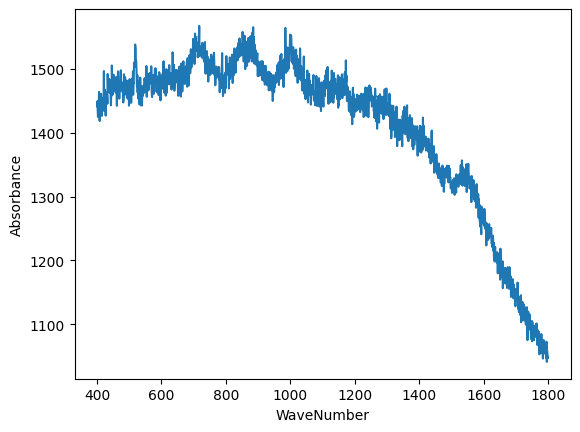

In [7]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

Pivot the Dataframe to create a column for each wavelength

In [8]:
pivoted_df = df.pivot(index='SpecID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None
statuses = df[['SpecID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SpecID')
pivoted_df = pivoted_df.set_index('SpecID')

In [9]:
pivoted_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,1765.6628,1774.7809,1769.0302,1756.4220,1758.8690,1763.2300,1745.2285,1773.3534,1774.7166,1753.3281,...,1216.4025,1210.4993,1213.9619,1225.2153,1210.0010,1210.6858,1194.4679,1195.1451,1189.8683,Normal
201210-1-01,1966.9930,1962.4237,1954.5616,1954.3228,1963.0917,1975.0807,1979.3162,1963.4561,1968.4587,1964.0000,...,1339.4675,1382.6973,1363.7004,1360.6210,1354.0477,1353.0381,1353.9978,1361.2426,1370.2874,Normal
201210-1-02,2182.6694,2149.6565,2146.0227,2159.3459,2167.2910,2160.9861,2145.6575,2134.2004,2142.8303,2138.6309,...,1996.8234,1976.2070,1989.0183,1996.2838,1979.3507,1976.2002,1994.9839,1974.2030,1971.1880,Normal
201210-1-03,2445.0837,2430.4973,2422.7927,2434.3433,2454.9700,2462.8245,2454.7007,2467.7329,2449.5161,2421.3474,...,2010.1119,1992.3817,2022.6331,2001.8311,2010.0946,2006.4933,2017.2891,2038.1699,2000.6475,Normal
201210-1-04,2250.4536,2248.6235,2245.0984,2242.7173,2235.2803,2228.9585,2236.0095,2229.6091,2225.9231,2211.0359,...,2001.0719,2009.0385,1953.3303,1963.5698,1964.5299,1969.5634,1986.6266,1970.1484,2007.0848,Normal


##### PyCaret

In [10]:
import pandas as pd
from pycaret.classification import *

Set up the PyCaret environment

In [11]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,293,400.22778,1765.6628,201210-1,Normal
1,201210-1-00,294,400.91116,1774.7809,201210-1,Normal
2,201210-1-00,295,401.59454,1769.0302,201210-1,Normal
3,201210-1-00,296,402.27789,1756.4220,201210-1,Normal
4,201210-1-00,297,402.96127,1758.8690,201210-1,Normal
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,1617.3926,210526-3,Hyperglycemia
6239201,210526-3-09,2338,1797.72200,1633.0911,210526-3,Hyperglycemia
6239202,210526-3-09,2339,1798.40550,1633.3076,210526-3,Hyperglycemia
6239203,210526-3-09,2340,1799.08890,1641.8665,210526-3,Hyperglycemia


In [12]:
caret = setup(data=pivoted_df, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2050)"
5,Transformed data shape,"(3045, 2050)"
6,Transformed train set shape,"(2131, 2050)"
7,Transformed test set shape,"(914, 2050)"
8,Numeric features,2049
9,Preprocess,True


Compare models

In [14]:
#compare_models(exclude=['lgbm', 'gbc'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:07:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8038,0.0000,0.8038,0.8055,0.8036,0.7052,0.7061,0.3980
rf,Random Forest Classifier,0.7930,0.0000,0.7930,0.7952,0.7927,0.6888,0.6902,0.8220
knn,K Neighbors Classifier,0.7297,0.0000,0.7297,0.7338,0.7295,0.5945,0.5962,0.2710
lr,Logistic Regression,0.6842,0.0000,0.6842,0.6846,0.6828,0.5244,0.5256,7.7030
dt,Decision Tree Classifier,0.6781,0.0000,0.6781,0.6792,0.6772,0.5160,0.5171,0.7110
ada,Ada Boost Classifier,0.5978,0.0000,0.5978,0.6026,0.5955,0.3940,0.3973,3.2600
ridge,Ridge Classifier,0.5974,0.0000,0.5974,0.6309,0.5790,0.3873,0.4119,1.2870
nb,Naive Bayes,0.4627,0.0000,0.4627,0.4735,0.4076,0.1790,0.2141,0.2050
svm,SVM - Linear Kernel,0.4543,0.0000,0.4543,0.4663,0.3751,0.1736,0.2177,0.3230
lda,Linear Discriminant Analysis,0.3947,0.0000,0.3947,0.3957,0.3939,0.0914,0.0917,1.8210


Processing:   0%|          | 0/53 [00:00<?, ?it/s]

KeyboardInterrupt: 

Create the model

In [15]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8458,0.0000,0.8458,0.8464,0.8454,0.7686,0.7692
1,0.8075,0.0000,0.8075,0.8080,0.8064,0.7104,0.7117
2,0.7981,0.0000,0.7981,0.7989,0.7983,0.6966,0.6968
3,0.8075,0.0000,0.8075,0.8086,0.8079,0.7109,0.7110
4,0.8028,0.0000,0.8028,0.8034,0.8024,0.7031,0.7038
5,0.8216,0.0000,0.8216,0.8235,0.8206,0.7313,0.7331
6,0.7887,0.0000,0.7887,0.7931,0.7892,0.6827,0.6841
7,0.8263,0.0000,0.8263,0.8291,0.8269,0.7394,0.7401
8,0.7653,0.0000,0.7653,0.7677,0.7655,0.6479,0.6487


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
#tuned_model = tune_model(model)
tuned_model = tune_model(model, n_iter=10, search_library='optuna')

ModuleNotFoundError: 
'optuna' is a soft dependency and not included in the pycaret installation. Please run: `pip install optuna` to install.
Alternately, you can install this by running `pip install pycaret[tuners]`

In [18]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…